# Ejemplo Partes de Función

## Motivación enunciado:

![circuito motivacion](partes_de_funcion_ejemplo_clase/circuito_motivacion.png)

$|V_I(jw)|^2*G_I(jw) = |V_O(jw)|^2*G_L$

$G_{I}(jw) = |H(jw)|^2$

Con $G_L = 1$.

$|H(jw)|^2 = \frac{1}{81} \frac{(9-w^2)^2}{1 + w^6}$ --polos Butterworth con cero de transmisión en $\omega=3$--

$G_{I}(jw) = Real(Y(jw)) = \frac{1}{81} \frac{w^4 - 18 w^2 + 81}{1 + w^6}$

## Enunciado

Se dispone de una impedancia cuya parte real es:

$Real(Y(jw)) = \frac{1}{81} \frac{w^4 - 18 w^2 + 81}{1 + w^6}$

Encuentre la admitancia $Y(s)$.


## ¿Cómo se relaciona Y(s) con su parte real en el eje de las $\omega$?

$Y(s) = Par(Y(s)) + Impar(Y(s))$

$Y(s) = M(s) + N(s)$

$M(jw) = Real(Y(jw))$

En este ejemplo:

$M(s) = \frac{1}{81} \frac{s^4 + 18 s^2 + 81}{1-s^6}$

Obtenemos $M(s)$ en terminos $Y(s)$:

$Y(s) + Y(-s) = M(s) + N(s) + M(s) - N(s)$

$Y(s) + Y(-s) = 2 * M(s)$

$M(s) = \frac{Y(s) + Y(-s)}{2}$

Relacionamos las singularidades:

$Y(s) = \frac{A(s)}{B(s)}$

$M(s) = \frac{A(s)*B(-s) + A(-s)*B(s)}{2*B(s)B(-s)}$

## ¿A qué conclución nos lleva $M(s) = \frac{A(s)*B(-s) + A(-s)*B(s)}{2*B(s)B(-s)}$?

* Los polos de $M(s)$ son o bien polos de $Y(s)$ o de $Y(-s)$.

## Cálculo de los polos de $Y(s)$

In [2]:
import numpy as np

den = [-1, 0, 0, 0, 0, 0, 1]
roots = np.roots(den)
print(f"Polos de M(s): {roots}")

Polos de M(s): [-1. +0.j        -0.5+0.8660254j -0.5-0.8660254j  0.5+0.8660254j
  0.5-0.8660254j  1. +0.j       ]


Por lo tanto, $Y(s)$ sera de la forma:

$Y(s) = \frac{A(s)}{s^3 + 2*s^2 + 2*s + 1}$

## ¿De qué grado puede ser el polinomio $A(s)$?

$Y(s) = \frac{A(s)}{s^3 + 2s^2 + 2s + 1}$

$M(s) = \frac{1}{81} \frac{s^4 + 18 s^2 + 81}{1 - s^6}$

* El grado del numerador y denominador de $Y(s)$ pueden difererir a lo sumo en 1 (i.e. la diferencia puede ser +1, -1, 0).
* $A(s)$ debe ser por lo menos de segundo grado!!

## Obtención de $A(s)$

$M(s) = \frac{1}{81} \frac{s^4 + 18 s^2 + 81}{1 - s^6}$

$M(s) = \frac{A(-s)*B(s) + A(s)*B(-s)}{2*B(s)*B(-s)}$

$A(-s)*B(s) + A(s)*B(-s) = (m_1(s)-n_1(s))*(m_2(s)+n_2(s)) + (m_1(s)+n_1(s))*(m_2(s)-n_2(s))$

$A(-s)*B(s) + A(s)*B(-s) = 2 * (m_1(s)*m_2(s) - n_1(s)*n_2(s))$

$m_1(s)*m_2(s) - n_1(s)*n_2(s) = s^4 + 18 s^2 + 81$

$(a_2*s^2 + a_0) * (2*s^2 + 1) - a_1 * s * (s^3 + 2*s) = (s^4 + 18 * s^2 + 81) / 81$

---

$(2 * a_2 - a_1) * s^4  + (a_2 - 2 * a_1 + 2 * a_0) * s^2 + a_0 = (s^4 + 18 * s^2 + 81) / 81$

---

Nos queda:

$a_0 = 1$

$2 * a_2 - a_1 = \frac{1}{81}$

$a_2 - 2 * a_1 + 2 * a_0 = \frac{18}{81}$

Resolviendo:

$a_0 = 1$

$a_1 = \frac{578}{486} = 1.1893$

$a_2 = \frac{146}{243} = 0.6008$

## Obtuvimos $Y(s)$!!!

$Y(s) = \frac{1}{81} \frac{146/3 * s^2 + 578/6 * s + 81}{s^3 + 2s^2 + 2s + 1}$

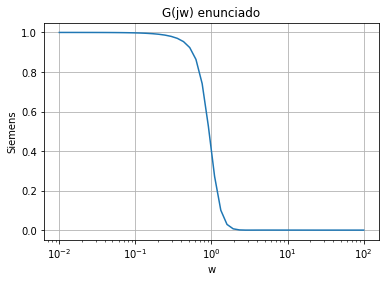

In [3]:
import matplotlib.pyplot as plt

w = np.logspace(-2, 2)
g_enunciado = (w ** 4 - 18 * (w ** 2) + 81) / (1 + w ** 6) / 81
y_obtenida = (-146/3 * (w ** 2) + 1j * 578/6 * w + 81)/(-1j * (w ** 3) - 2 * (w ** 2) + 2j * w + 1) / 81
g_obtenida = y_obtenida.real

# Ploteo
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False)
ax.set_ylabel('Siemens')
ax.set_xlabel('w')
ax.set_title('G(jw) enunciado')
ax.grid(True)
ax.semilogx(w, g_enunciado)

plt.show()

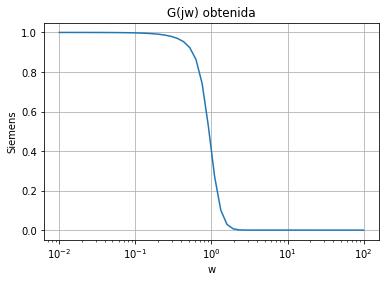

In [4]:
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False)
ax.set_ylabel('Siemens')
ax.set_xlabel('w')
ax.set_title('G(jw) obtenida')
ax.grid(True)
ax.semilogx(w, g_obtenida)

plt.show()

## Posible Implementación

![posible implementación](partes_de_funcion_ejemplo_clase/posible_sintesis.png)

# Obtención de $F(s)$ a partir de otras partes de función

* A partir de $|F(s)|^2$
  * Ya utilizamos este método en teoría moderna de filtros (ej.: Butter, Cheby).

* A partir de $Imag(F(s))$
  * Idem al método recién visto.

* A partir de $\phi(jw)$
  * Útil en diseño de desfasadores.

* A partir de $\tau(s)$
  * Útil cuando se quiere diseñar filtros con ciertas características de retardo.

## A partir de $\phi(j\omega) = ang(F(j\omega))$

$F(j\omega) = |F(j\omega)|*e^{j*\phi(j\omega)}$

$\frac{F(j\omega)}{F(-j\omega)} = e^{2j*\phi(j\omega)}$

$\frac{F(j\omega)}{F(-j\omega)} = \frac{e^{j*\phi(j\omega)}}{e^{-j*\phi(j\omega)}}$

$\frac{F(j\omega)}{F(-j\omega)} = \frac{cos(\phi(j\omega))+j*sin(\phi(j\omega)}{cos(\phi(j\omega))-j*sin(\phi(j\omega)}$

$\frac{F(j\omega)}{F(-j\omega)} = \frac{1+j*tg(\phi(j\omega))}{1-j*tg(\phi(j\omega))}$

$\frac{F(s)}{F(-s)} = \frac{A(s)*B(-s)}{A(-s)*B(s)}$

* Los polos en el semiplano derecho de $\frac{F(s)}{F(-s)}$ seran ceros de F(-s) --sino $F(s)$ sería inestable--.
* Los polos en el semiplano izquierdo de $\frac{F(s)}{F(-s)}$, pueden ser tanto polos de $F(s)$ como ceros de $F(-s)$ --a elección--.
* Diferencia de grado entre numerador y denominador $F(s)$ tiene que ser admisible. Para una transferencia $grado(num) < gr(den)$.

## A partir de $\tau(\omega)$

$\tau(j\omega) = - \frac{d\phi(j\omega)}{d\omega}$

Se puede demostrar que:

$\tau(w) = \sum_i{\frac{\sigma_{z\_i}}{\sigma^2_{z\_i} + (\omega-\omega_{z\_i})^2}} - \sum_k{\frac{\sigma_{p\_k}}{\sigma^2_{p\_k} + (\omega-\omega_{p\_k})^2}}$

Donde:

$s_{z\_i} = \sigma_{z\_i} + j \omega_{z\_i}$ son los zeros de $F(s)$ y

$s_{p\_k} = \sigma_{p\_k} + j \omega_{p\_k}$ son los polos.

---

Descomponiendo $\tau(s)$ en fracciones simples podemos recomponer $F(s)$ teniendo en cuenta las siguientes observaciones:

* Si el residuo --el numerador-- es negativo, debera corresponder a un cero de $F(s)$ en el semiplano izquierdo.
* Si el residuo es positivo, puede corresponder tanto a un cero de $F(s)$ en el semiplano derecho como a un polo en el semiplano izquierdo.